# CrazyTaxi - Anomaly Detection

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [232]:
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing

In [233]:
df = pd.read_pickle('./data/df_new.pkl')

In [234]:
df['date'] = df['lpep_pickup_datetime'].dt.day

In [235]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,payment_type,trip_type,trip_duration,month,day,total_custom,weekend_Trip,hour,airport,date
0,2017-12-31 23:55:09,2017-12-31 23:59:14,1,17,61,1,1.1,5.5,0.5,0.5,...,2,1.0,4.083333,12,6,6.80,1,23,0,31
1,2017-12-31 23:30:36,2017-12-31 23:37:20,1,61,49,1,1.1,6.5,0.5,0.5,...,2,1.0,6.733333,12,6,7.80,1,23,0,31
2,2017-12-31 23:02:26,2017-12-31 23:19:37,1,228,188,1,4.1,15.5,0.5,0.5,...,1,1.0,17.183333,12,6,20.15,1,23,0,31
3,2017-12-31 23:12:24,2017-12-31 23:16:55,1,228,26,1,0.8,5.0,0.5,0.5,...,2,1.0,4.516667,12,6,6.30,1,23,0,31
4,2017-12-31 23:53:11,2017-12-31 23:55:40,1,225,225,1,0.5,4.0,0.5,0.5,...,2,1.0,2.483333,12,6,5.30,1,23,0,31


In [236]:
df.describe()

,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,payment_type,trip_type,trip_duration,month,day,total_custom,weekend_Trip,hour,airport,date
count,2.249711e+06,2.249711e+06,2.249711e+06,2.249711e+06,2.249711e+06,2.249711e+06,2.249711e+06,2.249711e+06,2.249711e+06,2.249711e+06,...,2.249711e+06,2.249711e+06,2.249711e+06,2.249711e+06,2.249711e+06,2.249711e+06,2.249711e+06,2.249711e+06,2.249711e+06,2.249711e+06
mean,1.039095e+00,1.101957e+02,1.281327e+02,1.172171e+00,2.631251e+00,1.151480e+01,3.643969e-01,4.950623e-01,1.154591e+00,9.351619e-02,...,1.548887e+00,1.008477e+00,1.255415e+01,6.074332e+00,3.180049e+00,1.391966e+01,1.453182e-01,1.368976e+01,1.656879e-02,1.555978e+01
std,3.829761e-01,7.461966e+01,7.702008e+01,5.077794e-01,2.760246e+00,8.611613e+00,3.877712e-01,4.944386e-02,2.012058e+00,8.763555e-01,...,5.770545e-01,9.167767e-02,1.044245e+01,3.409181e+00,1.965140e+00,9.936639e+00,3.524215e-01,6.402933e+00,1.276490e-01,8.777252e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-01,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,1.666667e-02,1.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.900000e+01,6.100000e+01,1.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,5.916667e+00,3.000000e+00,2.000000e+00,7.800000e+00,0.000000e+00,9.000000e+00,0.000000e+00,8.000000e+00
50%,1.000000e+00,8.200000e+01,1.250000e+02,1.000000e+00,1.700000e+00,9.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,...,2.000000e+00,1.000000e+00,9.783333e+00,6.000000e+00,3.000000e+00,1.080000e+01,0.000000e+00,1.500000e+01,0.000000e+00,1.500000e+01
75%,1.000000e+00,1.660000e+02,1.890000e+02,1.000000e+00,3.200000e+00,1.400000e+01,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,...,2.000000e+00,1.000000e+00,1.610000e+01,9.000000e+00,5.000000e+00,1.655000e+01,0.000000e+00,1.900000e+01,0.000000e+00,2.300000e+01
max,6.000000e+00,2.650000e+02,2.650000e+02,9.000000e+00,6.400000e+02,9.650000e+02,3.000000e+01,8.300000e-01,4.495600e+02,3.625000e+02,...,5.000000e+00,2.000000e+00,2.359333e+03,1.200000e+01,6.000000e+00,1.004420e+03,1.000000e+00,2.300000e+01,1.000000e+00,3.100000e+01


# Anomaly

In [237]:
df_anomaly = df.groupby(['month','day','date','hour'])['PULocationID'].count().reset_index(name="count")

In [238]:
df_anomaly = df_anomaly.rename(columns={'day':'weekday'})
df_anomaly.head()

,month,weekday,date,hour,count
0,1,0,2,0,204
1,1,0,2,1,129
2,1,0,2,2,101
3,1,0,2,3,82
4,1,0,2,4,73


In [239]:
df_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 5 columns):
month      8759 non-null int64
weekday    8759 non-null int64
date       8759 non-null int64
hour       8759 non-null int64
count      8759 non-null int64
dtypes: int64(5)
memory usage: 342.2 KB


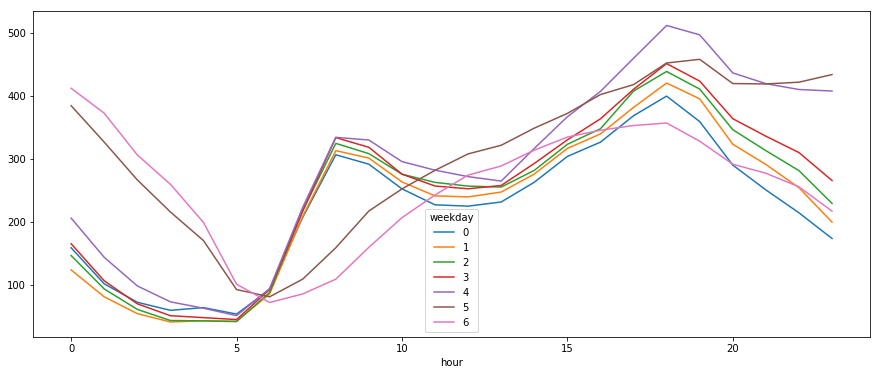

In [240]:
df_anomaly.pivot_table('count', index='hour', columns='weekday').plot(figsize=(15,6))

We can see from the curves that the trip pattern of weekend is diffrent with weekdays. The curves rises earlier in the morning of weekdays, and people take more trips in the night of Friday and Saturday.

In [241]:
data = df_anomaly

In [242]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

# train isolation forest 

outlierFraction = 0.005
model = IsolationForest(contamination = outlierFraction)
model.fit(data)

# add the data to the main  
df_anomaly['anomaly'] = pd.Series(model.predict(data))
df_anomaly['anomaly'] = df_anomaly['anomaly'].map( {1: 0, -1: 1} )

C:\Users\Christine\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [243]:
#df_anomaly['time_epoch'] = df_anomaly.apply(lambda x: (x['hour'] + 24 * x['date']+ 310*24*x['month']))
df_anomaly['time_epoch'] = df_anomaly.hour + 24 * df_anomaly.date+ 31*24* df_anomaly.month

In [244]:
df_anomaly.head()

,month,weekday,date,hour,count,anomaly,time_epoch
0,1,0,2,0,204,1,792
1,1,0,2,1,129,0,793
2,1,0,2,2,101,0,794
3,1,0,2,3,82,0,795
4,1,0,2,4,73,0,796


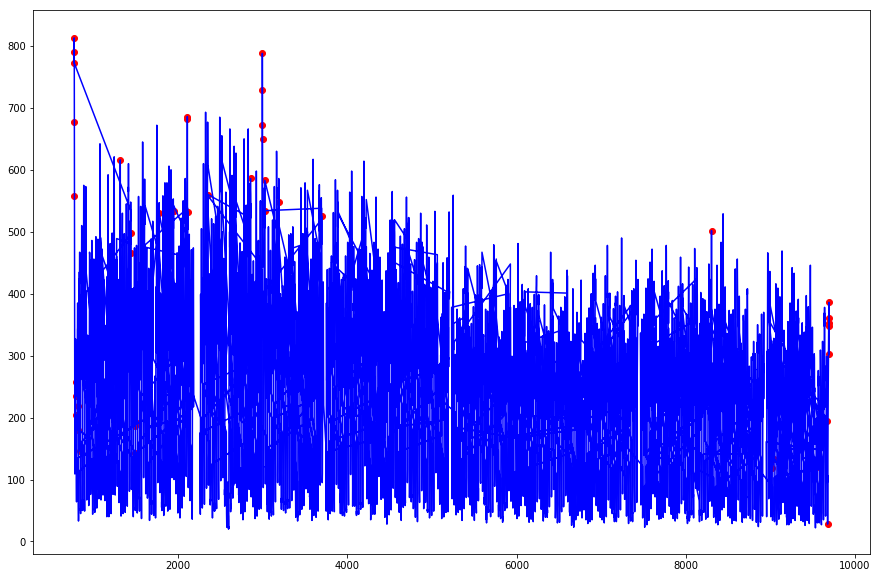

In [245]:
fig, ax = plt.subplots( figsize=(15,10))

a = df_anomaly.loc[df_anomaly['anomaly'] == 1, ['time_epoch', 'count']] #anomaly

ax.plot(df_anomaly['time_epoch'], df_anomaly['count'], color='blue')
ax.scatter(a['time_epoch'],a['count'], color='red')
plt.show()

In [246]:
df_anomaly1 = df_anomaly.groupby(["month",'date'])['anomaly'].sum()
df_value = df_anomaly.groupby(["month",'date'])['count'].sum()

df_anomaly1 = pd.DataFrame(df_anomaly)
df_value = pd.DataFrame(df_value)

df_anomaly1.reset_index(inplace=True)
df_anomaly1.drop(['count'], axis=1)
df_anomaly1.head()

,index,month,weekday,date,hour,count,anomaly,time_epoch
0,0,1,0,2,0,204,1,792
1,1,1,0,2,1,129,0,793
2,2,1,0,2,2,101,0,794
3,3,1,0,2,3,82,0,795
4,4,1,0,2,4,73,0,796


In [247]:
df_value.reset_index(inplace=True)
df_value.head()

,month,date,count
0,1,1,7836
1,1,2,4986
2,1,3,6190
3,1,4,6582
4,1,5,6943


In [248]:
df_anomaly_date = pd.merge(df_anomaly, df_value, on=['month','date'])
df_anomaly_date.head()

,index,month,weekday,date,hour,count_x,anomaly,time_epoch,count_y
0,0,1,0,2,0,204,1,792,4986
1,1,1,0,2,1,129,0,793,4986
2,2,1,0,2,2,101,0,794,4986
3,3,1,0,2,3,82,0,795,4986
4,4,1,0,2,4,73,0,796,4986


In [249]:
anomaly_result=df_anomaly_date[(df_anomaly_date['anomaly']>=1)]
anomaly_result

,index,month,weekday,date,hour,count_x,anomaly,time_epoch,count_y
0,0,1,0,2,0,204,1,792,4986
22,22,1,0,2,22,219,1,814,4986
23,23,1,0,2,23,180,1,815,4986
90,90,1,0,23,18,616,1,1314,6835
119,119,1,0,30,23,187,1,1487,6145
143,143,1,1,3,23,146,1,839,6190
216,216,1,1,31,0,143,1,1488,6434
217,217,1,1,31,1,82,1,1489,6434
239,239,1,1,31,23,192,1,1511,6434
624,624,1,6,1,0,773,1,768,7836
